# Research on hypotheses that may help boost revenue
> Purpose: to help the marketing department boost revenue.

# Summary

ICE/RICE frameworks were applied to the hypotheses of interest and were prioritized to the respective frameworks.  According to the RICE scores, more users will be affected by the updates introduced in hypotheses 7, 2, 0, and 6. The ICE scores do not account for how many users the introduced updates will affect.

Based on the A/B test results, the test should be stopped and group B should be considered the leader. To reiterate:
+ Users in group B bring in the most money as compared to group A when looking at the cumulative revenue by group.
+ The cumulative value of the groups' average purchase sizes fluctuates, however group B is shown to have the largest average order size.
+ Group B has the greater conversion rate after gradually increasing and stabilizing at an almost steady value as compared to group A.
+ Both the raw and filtered data indicate statistically significant differences between the groups with a relative conversion gain for group B, compared with group A, being 16% (raw) and 16.3% (filtered).

## Open the data file and study the general information

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

try:
    hypotheses = pd.read_csv(
            '/datasets/hypotheses_us.csv', 
            sep=';')
    orders = pd.read_csv(
            '/datasets/orders_us.csv',
            dtype={'group': 'category'},
            parse_dates=['date'])
    visits = pd.read_csv(
            '/datasets/visits_us.csv',
            dtype={'group': 'category'},
            parse_dates=['date'])
except:
    hypotheses = pd.read_csv(
            'hypotheses_us.csv', 
            sep=';')
    orders = pd.read_csv(
            'orders_us.csv',
            dtype={'group': 'category'},
            parse_dates=['date'])
    visits = pd.read_csv(
            'visits_us.csv',
            dtype={'group': 'category'},
            parse_dates=['date'])

In [2]:
hypotheses.info(memory_usage='deep')
hypotheses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.6 KB


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [3]:
orders.info(memory_usage='deep')
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.9 KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [4]:
visits.info(memory_usage='deep')
visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null category
visits    62 non-null int64
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


### Conclusion
The datasets were optimized as best as they could be. The *date* columns were changed to a date type, and the *group* columns were changed to a category data type.

## Data preparation

In [5]:
# determining proportion of missing values for each dataset
print('Proportion of missing values for hypotheses dataset:')
print(hypotheses.isna().sum() / hypotheses.shape[0])
print()
print('Proportion of missing values for orders dataset:')
print(orders.isna().sum() / orders.shape[0])
print()
print('Proportion of missing values for visits dataset:')
print(visits.isna().sum() / visits.shape[0])

Proportion of missing values for hypotheses dataset:
Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Effort        0.0
dtype: float64

Proportion of missing values for orders dataset:
transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

Proportion of missing values for visits dataset:
date      0.0
group     0.0
visits    0.0
dtype: float64


In [6]:
# checking for duplicates
print('hypotheses duplicates:')
print(hypotheses.duplicated().sum())
print()
print('orders visitor ID duplicates:')
print(orders['visitorId'].duplicated().sum())
print()
print('visits duplicates:')
print(visits.duplicated().sum())

hypotheses duplicates:
0

orders visitor ID duplicates:
166

visits duplicates:
0


In [7]:
dup_visitors = orders.groupby('visitorId').agg({'group': 'nunique'})
dup_visitors = dup_visitors[dup_visitors['group']>1]
dup_visitors = dup_visitors.reset_index()
to_drop = dup_visitors['visitorId']

In [8]:
orders = orders[~orders['visitorId'].isin(to_drop)]

### Conclusion

There are no missing values discernible for all three datasets. The duplicated visitors that might have gotten into both group A and B have been removed.

## Prioritizing Hypotheses

In [9]:
# applying the ICE/RICE framework to prioritize hypotheses
hypotheses['ice_score'] = (hypotheses['Impact']*hypotheses['Confidence']) / hypotheses['Effort']
hypotheses['rice_score'] = (hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence']) / hypotheses['Effort']
hypotheses_ice = hypotheses.sort_values(by='ice_score', ascending=False)
hypotheses_ice

,Hypothesis,Reach,Impact,Confidence,Effort,ice_score,rice_score
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


In [10]:
hypotheses_rice = hypotheses.sort_values(by='rice_score', ascending=False)
hypotheses_rice

,Hypothesis,Reach,Impact,Confidence,Effort,ice_score,rice_score
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


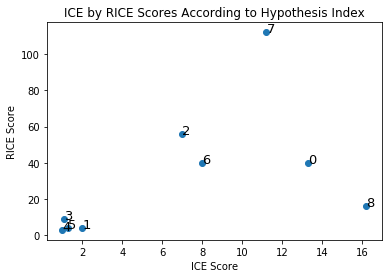

In [11]:
ice = [13.3, 2, 7, 1.1, 1, 1.3, 8, 11.2, 16.2]
rice = [40, 4, 56, 9, 3, 4, 40, 112, 16.2]
hyp_index = [0, 1, 2, 3, 4, 5, 6, 7, 8]

fig, ax = plt.subplots()
ax.scatter(ice, rice)

for i, txt in enumerate(hyp_index):
    ax.annotate(txt, (ice[i], rice[i]), fontsize=13)

plt.title('ICE by RICE Scores According to Hypothesis Index')
ax.set(xlabel="ICE Score", ylabel="RICE Score")
plt.show()

**Figure 1: ICE by RICE Scores According to Hypothesis Index**

*Description:* Applying the ICE/RICE frameworks and the reflected hypotheses indexes.

### Conclusion
Applying the ICE framework, the hypotheses were prioritized as follows: 8, 0, 7, 6, 2, 1, 5, 3, 4. Applying the RICE framework, the hypotheses were then prioritized as such: 7, 2, 0, 6, 8, 3, 1, 5, 4. According to the RICE scores, more users will be affected by the updates introduced in hypotheses 7, 2, 0, and 6. The ICE scores do not account for how many users the introduced updates will affect.

## A/B Test Analysis

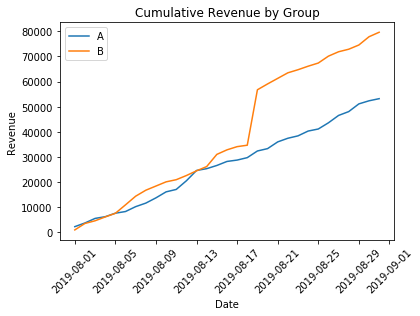

In [12]:
orders['group'] = orders['group'].cat.as_ordered()
visits['group'] = visits['group'].cat.as_ordered()

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = orders.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated.head(10)

visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeRevenueA = ordersAggregated[ordersAggregated['group'] == 'A'][
    ['date', 'revenue', 'transactionId']
]
cumulativeRevenueB = ordersAggregated[ordersAggregated['group'] == 'B'][
    ['date', 'revenue', 'transactionId']
]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.title("Cumulative Revenue by Group")
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend()
plt.show()

**Figure 2: Cumulative Revenue by Group**

*Description:* Users in group B bring in the most money as compared to group A.

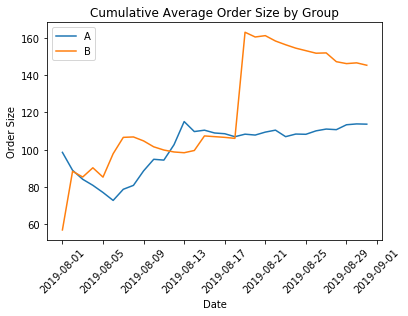

In [13]:
plt.plot(
    cumulativeRevenueA['date'],
    cumulativeRevenueA['revenue'] / cumulativeRevenueA['transactionId'],
    label='A',
)
plt.plot(
    cumulativeRevenueB['date'],
    cumulativeRevenueB['revenue'] / cumulativeRevenueB['transactionId'],
    label='B',
)
plt.xticks(rotation=45)
plt.title("Cumulative Average Order Size by Group")
plt.ylabel('Order Size')
plt.xlabel('Date')
plt.legend()
plt.show()

**Figure 3: Cumulative Average Order Size by Group**

*Description:* The cumulative value of the groups' average purchase sizes is fluctuating.

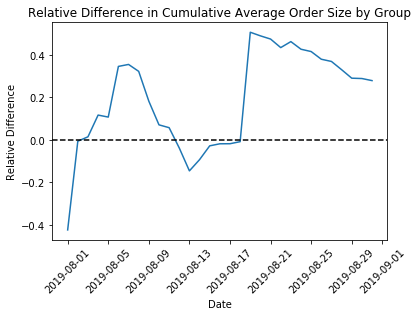

In [14]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['transactionIdB'])
    / (
        mergedCumulativeRevenue['revenueA']
        / mergedCumulativeRevenue['transactionIdA']
    )
    - 1,
)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title("Relative Difference in Cumulative Average Order Size by Group")
plt.ylabel('Relative Difference')
plt.xlabel('Date')
plt.show()

**Figure 4: Relative Difference in Cumulative Average Order Size by Group**

*Description:* There were several sudden and considerable changes that might have something to do with abnormally large purchases.

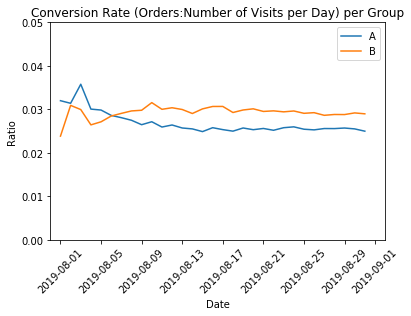

In [15]:
cumulativeData['conversion'] = (
    cumulativeData['transactionId'] / cumulativeData['visits']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.title("Conversion Rate (Orders:Number of Visits per Day) per Group")
plt.ylabel('Ratio')
plt.xlabel('Date')
plt.legend()
plt.axis(["2019-07-31", '2019-09-02', 0, 0.05])
plt.show()

**Figure 5: Conversion Rate (Orders:Number of Visits per Day) per Group**

*Description:* At the beginning of the test group A had a higher conversion rate, but group B gradually gained and stabilized at an almost steady value.

         userId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


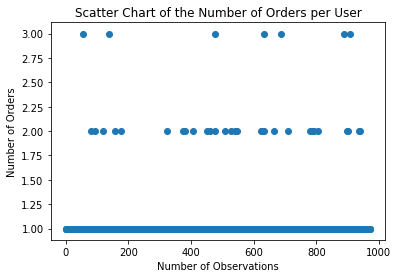

In [16]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# the range of numbers from 0 to the number of observations in ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Scatter Chart of the Number of Orders per User")
plt.ylabel('Number of Orders')
plt.xlabel('Number of Observations')
plt.show()

**Figure 6: Scatter Chart of the Number of Orders per User**

*Description:* There is a small number of users with more than one order.

In [17]:
print('95th and 99th percentiles for the number of orders per user:')
print(np.percentile(ordersByUsers['orders'], [95, 99]))

95th and 99th percentiles for the number of orders per user:
[1. 2.]


**Interpretation:** No more than 5% of users placed more than one order, and no more than 1% of users made more than two orders. The point at which a data point becomes an anomaly is when a user makes two or more orders.

      transactionId   visitorId       date  revenue group
425   590470918      1920142716 2019-08-19  19920.4  B   
1196  3936777065     2108080724 2019-08-15  3120.1   B   
1136  666610489      1307669133 2019-08-13  1425.8   A   
744   3668308183     888512513  2019-08-27  1335.6   B   
743   3603576309     4133034833 2019-08-09  1050.0   A   
1103  1348774318     1164614297 2019-08-12  1025.8   A   
1099  316924019      148427295  2019-08-12  1015.9   A   
949   1347999392     887908475  2019-08-21  930.0    A   
940   2420050534     4003628586 2019-08-08  905.8    B   
613   4071177889     3931967268 2019-08-07  830.3    B   


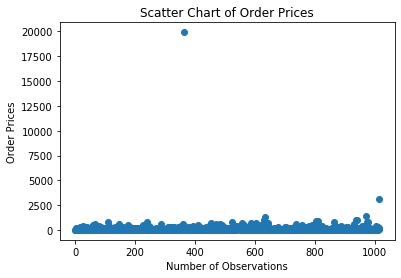

In [18]:
print(orders.sort_values(by='revenue',ascending=False).head(10))

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title("Scatter Chart of Order Prices")
plt.ylabel('Order Prices')
plt.xlabel('Number of Observations')
plt.show()

**Figure 7: Scatter Chart of Order Prices**

*Description:* There are not many orders above \\$2500. There are outliers about $2600 and \\$20,000.

In [19]:
print('95th and 99th percentiles for order prices:')
print(np.percentile(orders['revenue'], [95,99]))

95th and 99th percentiles for order prices:
[414.275 830.3  ]


**Interpretation:** No more than 5% of users placed orders that cost more than \\$414, and no more than 1% of users placed orders that cost more than \\$830. The point at which a data point becomes an anomaly is when a user places an order that costs more than $830.

For our hypothesis test we have the following:

$H_{0}$: The conversion in group A is equal to the conversion in group B using the raw data.
<br>$H_{a}$: The conversion in group A is not equal to the conversion in group B using the raw data.
<br>An alpha value of 0.05 was used since it is the most commonly used statistical significance level.

In [20]:
# finding the statistical significance of the difference in conversion between the groups using the raw data
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Mann-Whitney test p-value:')
print('{0:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print()
print('Relative conversion gain:')
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

Mann-Whitney test p-value:
0.00551

Relative conversion gain:
0.160


**Interpretation:** With a p-value of 0.00551, which is less than 0.05, we reject the null hypothesis. The raw data analysis showed that the groups' conversion rates have statistically significant differences and are not equal to one another. The relative conversion gain for group B compared with group A is 16%.

For our hypothesis test we have the following:

$H_{0}$: The average order size in group A is equal to the average order size in group B using the raw data.
<br>$H_{a}$: The average order size in group A is not equal to the average order size in group B using the raw data.
<br>An alpha value of 0.05 was used since it is the most commonly used statistical significance level.

In [21]:
# finding the statistical significance of the difference in average order size between the groups using the raw data
print('Mann-Whitney test p-value:')
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[orders['group'] == 'A']['revenue'],
            orders[orders['group'] == 'B']['revenue'],
        )[1]
    )
)
print()
print('Relative difference:')
print(
    '{0:.3f}'.format(
        orders[orders['group'] == 'B']['revenue'].mean()
        / orders[orders['group'] == 'A']['revenue'].mean()
        - 1
    )
)

Mann-Whitney test p-value:
0.431

Relative difference:
0.278


**Interpretation:** With a p-value of 0.431, which is greater than 0.05, we fail to reject the null hypothesis. Therefore, there are no statistically significant differences between the groups' average order sizes. Moreover, the relative difference is 27.8%.

For our hypothesis test we have the following:

$H_{0}$: The conversion in group A is equal to the conversion in group B using the filtered data.
<br>$H_{a}$: The conversion in group A is not equal to the conversion in group B using the filtered data.
<br>An alpha value of 0.05 was used since it is the most commonly used statistical significance level.

In [22]:
# finding the statistical significance of the difference in conversion between the groups using the filtered data
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 1000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Abnormal Users:')
print(abnormalUsers.head())

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('Mann-Whitney test p-value:')
print(
    "{0:.5f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
)
print()
print('Relative conversion gain (filtered data):')
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

Abnormal Users:
1099    148427295 
744     888512513 
1103    1164614297
1136    1307669133
425     1920142716
dtype: int64
Mann-Whitney test p-value:
0.00488

Relative conversion gain (filtered data):
0.163


**Interpretation:** With a p-value of 0.00488, which is less than 0.05, we reject the null hypothesis. The filtered data analysis showed that the groups' conversion rates have statistically significant differences and is not equal to one another. The relative conversion gain (using the filtered data) for group B compared with group A is 16.3%.

For our hypothesis test we have the following:

$H_{0}$: The average order size in group A is equal to the average order size in group B using the filtered data.
<br>$H_{a}$: The average order size in group A is not equal to the average order size in group B using the filtered data.
<br>An alpha value of 0.05 was used since it is the most commonly used statistical significance level.

In [23]:
# finding the statistical significance of the difference in average order size between the groups using the filtered data
print('Mann-Whitney test p-value:')
print(
    "{0:.3f}".format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print()
print('Relative difference (filtered data):')
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Mann-Whitney test p-value:
0.464

Relative difference (filtered data):
-0.034


**Interpretation:** With a p-value of 0.464, which is greater than 0.05, we fail to reject the null hypothesis. Therefore, there are no statistically significant differences between the groups' average order sizes after filtering the data. Moreover, the relative difference is 3.4%.

### Conclusion
Based on the test results, the test should be stopped and group B should be considered the leader. To reiterate:
+ Users in group B bring in the most money as compared to group A when looking at the cumulative revenue by group (Figure 2).
+ The cumulative value of the groups' average purchase sizes fluctuates, however group B is shown to have the largest average order size (Figure 3).
+ Group B has the greater conversion rate after gradually increasing and stabilizing at an almost steady value as compared to group A (Figure 5).
+ Both the raw and filtered data indicate statistically significant differences between the groups with a relative conversion gain for group B, compared with group A, being 16% (raw) and 16.3% (filtered).